## Dependencies

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
# Data on Housing Prices in DC
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")


In [3]:
test.head()

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,LN_PRICE
0,89279,5260 0823,2.0,1.0,1.0,Forced Air,Y,1.0,6.0,3.0,...,1.0,Comp Shingle,11.0,Hardwood/Carp,1.0,0.0,11,688,2018-07-22T18:01:43.000Z,12.409013
1,40572,2605 0056,3.0,0.0,13.0,Hot Water Rad,N,2.0,9.0,4.0,...,2.0,Built Up,6.0,Hardwood,2.0,1.0,24,2064,2018-07-22T18:01:43.000Z,13.513053
2,32817,1956 0116,4.0,1.0,7.0,Warm Cool,Y,1.0,10.0,5.0,...,2.0,Built Up,11.0,Hardwood/Carp,1.0,2.0,12,4583,2018-07-22T18:01:43.000Z,14.417091
3,12939,0939 0056,3.0,1.0,1.0,Forced Air,Y,1.0,10.0,4.0,...,13.0,Neopren,6.0,Hardwood,1.0,2.0,11,2147,2018-07-22T18:01:43.000Z,13.547631
4,59018,3200 0254,2.0,0.0,13.0,Hot Water Rad,N,1.0,6.0,3.0,...,2.0,Built Up,6.0,Hardwood,1.0,0.0,13,1576,2018-07-22T18:01:43.000Z,13.023647


In [4]:
train.head()
list(train)

['OBJECTID',
 'SSL',
 'BATHRM',
 'HF_BATHRM',
 'HEAT',
 'HEAT_D',
 'AC',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALEDATE',
 'QUALIFIED',
 'SALE_NUM',
 'GBA',
 'BLDG_NUM',
 'STYLE',
 'STYLE_D',
 'STRUCT',
 'STRUCT_D',
 'GRADE',
 'GRADE_D',
 'CNDTN',
 'CNDTN_D',
 'EXTWALL',
 'EXTWALL_D',
 'ROOF',
 'ROOF_D',
 'INTWALL',
 'INTWALL_D',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA',
 'GIS_LAST_MOD_DTTM',
 'LN_PRICE']

In [13]:
# Drop all observations where the outcome (price) is missing 
train = train[~train.LN_PRICE.isna()]
train = train[train.LN_PRICE > 0]
#Now we remove substitute the x variables in data using mean value to minimize their effect to the distribution
train=train.fillna(train.mean())
test=test.fillna(test.mean())
#Set the train data
train_y = train['LN_PRICE']
train_X = train[['BEDRM','BATHRM','GRADE','ROOMS','KITCHENS', 'LANDAREA']]

#set the test data
test_y = test['LN_PRICE']
test_X = test[['BEDRM','BATHRM','GRADE','ROOMS','KITCHENS', 'LANDAREA']]


In [14]:
#Check for missing values again
train_X

,BEDRM,BATHRM,GRADE,ROOMS,KITCHENS,LANDAREA
0,4.0,3.0,5.0,9.0,1.0,2234
1,3.0,2.0,6.0,7.0,1.0,3850
2,4.0,2.0,6.0,9.0,1.0,7866
3,3.0,1.0,3.0,6.0,1.0,2739
4,4.0,2.0,5.0,11.0,1.0,2097
...,...,...,...,...,...,...
43585,2.0,1.0,4.0,5.0,1.0,560
43586,3.0,2.0,5.0,7.0,1.0,1483
43587,4.0,2.0,4.0,9.0,1.0,1393
43588,3.0,3.0,4.0,6.0,2.0,878


In [15]:
#test if there is any na values
train_y.isnull().sum()
train_X.isnull().sum()

BEDRM       0
BATHRM      0
GRADE       0
ROOMS       0
KITCHENS    0
LANDAREA    0
dtype: int64

In [16]:
#Rescale all variables
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [17]:
#Turn the scaled variables into a data frame
train_X = pd.DataFrame(train_X,columns=col_names)

## look at train data

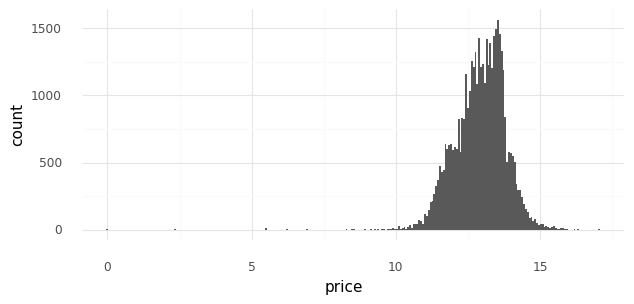

<ggplot: (309957979)>

In [31]:
(
    ggplot(pd.DataFrame(dict(price=train_y)),
           aes(x="price")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (7,3)) 
)

Seems like the price is follow a normal distribution

## Modeling


In [18]:
#We'll use 5 folds when cross-validating.
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [19]:
#We'll use mean squared error and the  𝑅2  as our performance metrics.
use_metrics = ["neg_mean_squared_error"]

#### Linear Model

In [20]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
lm_scores

{'fit_time': array([0.01968408, 0.00874496, 0.00853395, 0.00887895, 0.00759292]),
 'score_time': array([0.00273466, 0.00262094, 0.0022521 , 0.00203204, 0.00167012]),
 'test_neg_mean_squared_error': array([-0.44301577, -0.43563398, -0.43984452, -0.42526388, -0.45835521])}

#### KNN

In [21]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
knn_scores

{'fit_time': array([0.31380773, 0.19843912, 0.30212402, 0.30853796, 0.32024217]),
 'score_time': array([0.24028325, 0.19525194, 0.22330308, 0.21295595, 0.24345279]),
 'test_neg_mean_squared_error': array([-0.47364309, -0.46718299, -0.47523176, -0.47103465, -0.49137437])}

#### Decision Tree¶

In [22]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
dt_scores

{'fit_time': array([0.10855389, 0.10051394, 0.09707093, 0.09857202, 0.09951711]),
 'score_time': array([0.00538611, 0.00491285, 0.00468516, 0.004565  , 0.00500393]),
 'test_neg_mean_squared_error': array([-0.74894965, -0.70586027, -0.78463975, -0.73511231, -0.72119685])}

#### Bagging model

In [24]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
bag_scores


{'fit_time': array([0.76141477, 0.73141885, 0.65164375, 0.65747094, 0.66315508]),
 'score_time': array([0.04333115, 0.03083515, 0.03350401, 0.02787209, 0.0304029 ]),
 'test_neg_mean_squared_error': array([-0.51960498, -0.51173221, -0.54791662, -0.51361191, -0.53338598])}

#### Random forest model


In [25]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
rf_scores


{'fit_time': array([6.94978595, 6.67614198, 6.21635389, 7.25425506, 6.21733093]),
 'score_time': array([0.36971807, 0.26901102, 0.3520031 , 0.27464294, 0.28558803]),
 'test_neg_mean_squared_error': array([-0.49794365, -0.48283033, -0.51586209, -0.49071763, -0.51108007])}

### Now we compare the model we obtained 

In [26]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores



,Model,MSE
0,lm,0.443016
1,lm,0.435634
2,lm,0.439845
3,lm,0.425264
4,lm,0.458355
5,knn,0.473643
6,knn,0.467183
7,knn,0.475232
8,knn,0.471035
9,knn,0.491374


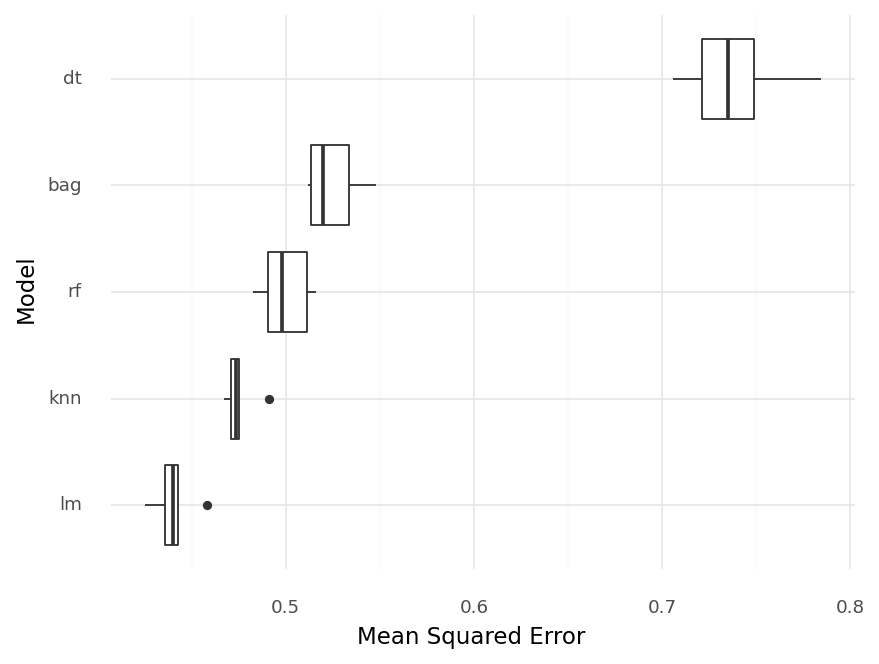

<ggplot: (310481065)>

In [27]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)



using the mean squared error as a determinent, we can see that the linear model fits best.

## Tuning Hyper-parameters¶

In [28]:
set_k = dict()
for k in [1,5,10,50,100,250]:
    score = cross_validate(KNN(n_neighbors=k),
                           train_X,train_y, 
                           cv = fold_generator, 
                           scoring =use_metrics)
    s = score['test_neg_mean_squared_error']
    set_k[k] = s.mean()


In [29]:
set_k

{1: -0.7691088496528233,
 5: -0.4756933707246788,
 10: -0.4390319619250379,
 50: -0.4155901610739689,
 100: -0.41415641955485166,
 250: -0.4185086042104791}

As we can see from the k values above, we can see k=100 is a turning point and therefore we choose k to be 100 in our model

## Using GridSearchCV

#### Turning KNN

In [30]:
mod = KNN() # Initialize the model class
mod.get_params() # report all the available tunning parameters 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

to find the best k that fits the model, we set the params around 100

In [33]:
knn_tune_params = {'n_neighbors':[85, 90, 95, 100, 105,110,115]}
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)
tune_knn.fit(train_X,train_y)



GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [85, 90, 95, 100, 105, 110, 115]},
             scoring='neg_mean_squared_error')

In [34]:
tune_knn.best_params_

{'n_neighbors': 100}

As we can see the best k parameter is 100 for the KNN model

In [35]:
tune_knn.best_score_

-0.41415641955485166

In [36]:
tune_knn.cv_results_

{'mean_fit_time': array([0.80004697, 0.71897321, 0.66016898, 0.60567646, 0.63292542,
        0.62917652, 0.58170514]),
 'std_fit_time': array([0.11088514, 0.09707146, 0.10150926, 0.10230297, 0.1001199 ,
        0.11239358, 0.10116403]),
 'mean_score_time': array([1.65402117, 1.54114261, 1.68655252, 1.66051221, 1.67362876,
        1.7911242 , 1.37646179]),
 'std_score_time': array([0.10566161, 0.05311544, 0.11976187, 0.13518988, 0.06134315,
        0.1434974 , 0.23937121]),
 'param_n_neighbors': masked_array(data=[85, 90, 95, 100, 105, 110, 115],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 85},
  {'n_neighbors': 90},
  {'n_neighbors': 95},
  {'n_neighbors': 100},
  {'n_neighbors': 105},
  {'n_neighbors': 110},
  {'n_neighbors': 115}],
 'split0_test_score': array([-0.41283395, -0.41295333, -0.41240205, -0.41219471, -0.41260632,
        -0.41254356, -0.41263967]),
 'split1_test_score'

## repeat the turning process on Decision Tree model

In [38]:
DTree().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [39]:
tune_dt = GridSearchCV(DTree(),{'max_depth':[i for i in range(10)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [40]:
tune_dt.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [41]:
tune_dt.best_params_

{'max_depth': 6}

In [42]:
tune_dt.best_score_

-0.4171337038504882

## Repeat on Random Forest

In [43]:
RF().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
rf_params = {'max_depth':[7,8,9],
             'n_estimators':[110,120,130],
              'max_features': [2,3,4]} # Only have three total. 
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [63]:
# This model will take longer to run given all the tuning parameters we're exploring
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [7, 8, 9], 'max_features': [3, 4, 5],
                         'n_estimators': [110, 120, 130]},
             scoring='neg_mean_squared_error')

In [64]:
tune_rf.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 120}

In [65]:
tune_rf.best_score_

-0.40728135666927245

Try #1 For the first try the result shows a best score when max_depth=3, max_features = 2 and n_estimators = 100, and a score of -0.45354, therefore we modify the scale of parameter to test for the best parameter
Try #2 This time we have a best score when max_depth=5, max_features = 3 and n_estimators = 110, and a score of -0.417956
Try #3 Due to the limit of the process ability of my laptop, we will gain the best score when max_depth = 9, n_estimators = 120 and max features = 3, now we have a best score of -0.4072813, which is the best model among all models so far.

## Modeling Pipeline

In [72]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BEDRM','BATHRM','GRADE','ROOMS','KITCHENS', 'LANDAREA'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[100]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[6]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[9],
     'model__max_features':[3],
     'model__n_estimators':[120]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=3)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BEDRM',
                                                                          'BATHRM',
                                                                          'GRADE',
                                                                          'ROOMS',
                                                                          'KITCHENS',
                                                                          'LANDAREA'])])),
                                       ('model', None)]),
             n_jobs=3,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor()],


In [73]:
#Find the best score:
search.best_score_

-0.4071369367334235

In [74]:
#Which model does the best?
search.best_params_

{'model': RandomForestRegressor(max_depth=9, max_features=3, n_estimators=120),
 'model__max_depth': 9,
 'model__max_features': 3,
 'model__n_estimators': 120}

The random forest model is the most accurate, which is intuitive as we tested in the previous process

## Run the test data through the pipeline

In [76]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)
m.mean_squared_error(test_y,pred_y)

7.893030455973779

In [83]:
m.r2_score(test_y,pred_y)

-9.673658074300521

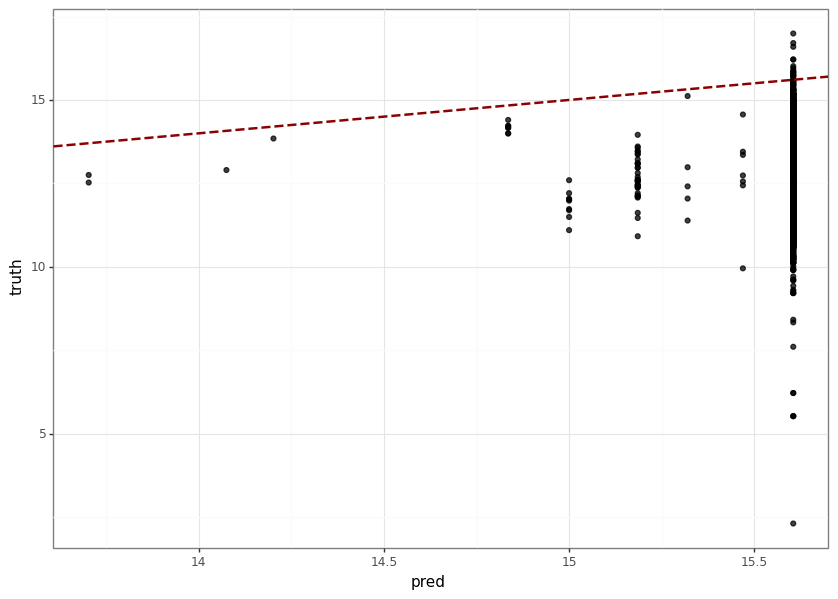

<ggplot: (314791690)>

In [84]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

To conclusion, the Random Forest model produced the best model among all the models we tested with a mean squared error of 7.893030. However, this value is pretty high so we could not say this is a very accurate model when compared to the true value from test data.